In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-13 23:25:23,260 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 23:25:23,262 - settings - Setting database.user to celiib
INFO - 2021-01-13 23:25:23,263 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 23:25:23,268 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-13 23:25:23,269 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-13 23:25:23,281 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-13 23:25:23,544 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-13 23:25:23,608 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 23:25:23,610 - settings - Setting database.user to celiib
INFO - 2021-01-13 23:25:23,611 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 23:25:23,615 - settings - Setting enable_python_native_blobs to True


Sleeping 27 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-13 23:25:23,879 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 9030


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,0,0,1,=BLOB=,1400375,2824255,0,0,0,0,1,8,185,95,7813492.355591639,3676864.0708675147,27015.716,77.107,77.107,491.082,454.082,2129,0.0002724773895089825,11.508108108108107,3947980.024,70,0.0005392631135562199,30.414,217783493374.38446,59995177.73949442,27872.746713386125,55163.271356609184,3111192762.4912066,1455.6467
864691135012398582,0,0.25,29.00,0,0,1,=BLOB=,1376990,2794781,0,3,1,3,2,7,333,193,13856190.93238171,7698561.170643449,24656.795,186.318,177.736,526.688,490.357,5195,0.0003749226627542612,15.6006006006006,8675139.424,177,0.0005988376377707425,29.35,911951270671.0396,95420451.33998108,65815.43767124508,105122.37626384453,5152267065.938077,5458.7971
864691135012471798,0,0.25,29.00,0,0,1,=BLOB=,879119,1793791,0,2,2,2,2,9,283,83,10497114.543519672,2577718.474621564,21129.674,99.883,99.883,462.738,399.451,2705,0.0002576898621793086,9.558303886925795,6119605.255,122,0.00044202197483079325,22.172,343672497908.9721,73909008.13184547,32739.71113529824,56159.25923133291,2816987687.77846,2996.3999
864691135012571126,0,0.25,29.00,0,0,1,=BLOB=,1405952,2834699,0,5,5,0,1,9,438,190,15004093.215539565,5950216.270015861,22562.141,138.374,138.374,464.441,411.031,5392,0.0003593686017903147,12.310502283105023,8644420.327,215,0.0006237549536038427,25.079,973808719997.8567,107423240.84708405,64902.87057063164,112651.70863525233,4529342883.710961,4656.7696
864691135012905110,0,0.25,29.00,0,0,1,=BLOB=,816541,1676641,0,1,1,0,1,11,251,106,9668645.374834057,3910789.1103980723,24484.065,87.846,87.846,377.57,360.525,2129,0.0002201963064589635,8.48207171314741,5024192.766,95,0.0004237496647038483,22.411,387684463243.85925,100390791.9785207,40097.08167112429,77163.53279026621,4080889086.777466,1999.7675
864691135065018692,0,0.25,29.00,0,0,1,=BLOB=,927599,1896021,0,3,3,1,2,19,275,62,10132292.236507235,2065737.434988684,17292.299,110.528,11

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,008c4d22e8e4c9b8eea4676f09706640,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10542,36039,2021-01-13 16:54:12
__neuron_split_suggestions,0cec0240576876905afc52bc010719e8,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10185,36032,2021-01-13 16:14:06
__neuron_split_suggestions,0e5cd6eab1b5f2e550cf30b458e990cf,error,=BLOB=,Exception: base_node (101) and upstream_node (136) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10479,36037,2021-01-13 16:57:56
__neuron_split_suggestions,13123179026cc7faebd655f15ef45844,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10542,36039,2021-01-13 16:59:28
__neuron_split_suggestions,29ef90c9bf67783e41258c6e923a177d,error,=BLOB=,Exception: base_node (68) and upstream_node (81) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10353,36034,2021-01-13 16:19:57
__neuron_split_suggestions,4b8616de1575f9dcfef86e69b2cdd0bc,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10416,36035,2021-01-13 16:30:20
__neuron_split_suggestions,4dd62a4a7f6e893aafc470b844f03f12,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10257,36033,2021-01-13 17:05:09
__neuron_split_suggestions,8e765a57fcf0e32ace865a137199826e,error,=BLOB=,Exception: base_node (34) and upstream_node (28) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10257,36033,2021-01-13 16:32:42
__neuron_split_suggestions,962778371ff53114b0f9fac08fb862dc,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10185,36032,2021-01-13 16:29:14
__neuron_split_suggestions,9afa904765a62664caa7d45238ddfa77,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10416,36035,2021-01-13 17:08:44


INFO - 2021-01-13 23:25:24,033 - autopopulate - Found 121 keys to populate
INFO - 2021-01-13 23:25:24,043 - connection - Transaction started
INFO - 2021-01-13 23:25:24,045 - autopopulate - Populating: {'segment_id': 864691135081745143, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0, 'index': 0}


Populate Started


----- Working on Neuron 864691135081745143-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [1]
multi_touch_limbs = []


 -------- Working on limb 1------------
Starting combinations to process = [[ 1 29]]


---- working on disconnecting 1 and 29
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [1, 0, 3, 28, 29]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 0  2  3  4 26 28 30]
Short segments to combine = []
Found 0 high degree coordinates to cut
Skipping endnode 1 because skeletal distance was 111.84065981953111 and threshold was 2500
skip_nodes = [1]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [0 3]: curr_angle = 14.8
  Edge: [ 3 28]: curr_angle = 47.38
  Edge: [28 29]: curr_angle = 18.99

Total time for doubling_back = 0.43743348121643066

Attempting the width jump check (attempting from both sides)
  Edge: [0 3]: jump = 148.21
  Edge: [ 3 28]: jump = 379.36
Adding error edge [ 3 28] because width jump was 379.3585205682109
  Edge: [28 29]: jump = 144.33
Total time for width = 0.4344003200531006
Path starting at 1 had err_edges: [[3, 28]]
  Edge: [29 28]: jump = -144.33
  Edge: [28  3]: jump = -379.36
  Edge: [3 0]: jump = 20.39
Total time for width = 0.41535496711730957
Path starting at 29 had err_edges: []
first_error_sizes = [379.3585205682109, -inf], winning_path = 0
***inside resolve crossover!!!!****
coordinate_branches = [3, 26, 28]
3 = red
26 = aqua
28 = purple
Angle between 3 and 26 = 110.25 
Angle between 3 and 28 = 55.7 
Angle between 26 and 28 = 14.9 
Final Matches = [[26, 28]]
matched_branches_revised = [[26, 28]]
Original graph


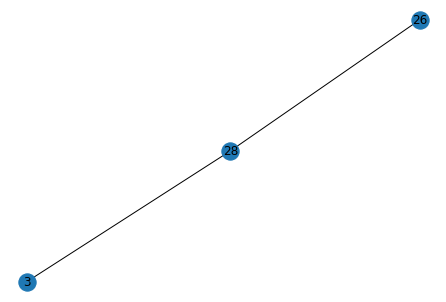

match_branches = [[26, 28]]
edges_to_delete (resolve crossover) = [[3, 26], [3, 28]]
edges_to_create (resolve crossover) = [[26, 28]]
edges_to_delete (cut_limb_network) = [array([ 3, 26]), array([ 3, 28])]
edges_to_create = [[26, 28]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9}
Comp 1 = {6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}
curr_limb_copy.deleted_edges = [array([ 3, 26]), array([ 3, 28])]
curr_limb_copy.created_edges = [[26, 28]]
After get best cut: cut_edges = [array([ 3, 26]), array([ 3, 28])], added_edges = [[26, 28]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([0, 1, 2, 3, 4, 5, 7, 8, 9]), array([ 6, 10, 11, 12, 13, 14, 15, 16

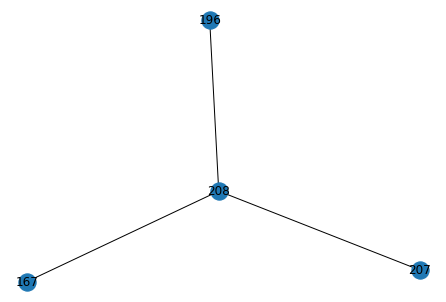

match_branches = [[167, 207], [196, 208]]
edges_to_delete (resolve crossover) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create (resolve crossover) = [[167, 207], [196, 208]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create = [[167, 207], [196, 208]]
Number of connected components = 2
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 27, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 44, 45, 46, 55, 56, 59, 60, 61, 62, 63, 73, 74, 75, 95, 106, 107, 108, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128

  Edge: [157 162]: curr_angle = 41.34
  Edge: [162 164]: curr_angle = 133.3
  Edge: [164 165]: curr_angle = 73.11
  Edge: [165 159]: curr_angle = 30.59
  Edge: [159 160]: curr_angle = 83.1
  Edge: [160 173]: curr_angle = 36.22
  Edge: [173 161]: curr_angle = 97.99

Total time for doubling_back = 0.4640655517578125
There were 1 edges that passed doubling back threshold of 100
Winning edge [162 164] had a doubling back of 133.30053902499665
***inside resolve crossover!!!!****
coordinate_branches = [135, 162, 164]
135 = red
162 = aqua
164 = purple
Angle between 135 and 162 = 6.55 
Angle between 135 and 164 = 38.09 
Angle between 162 and 164 = 135.4 
Final Matches = [[135, 162]]
matched_branches_revised = [[135, 162]]
Original graph


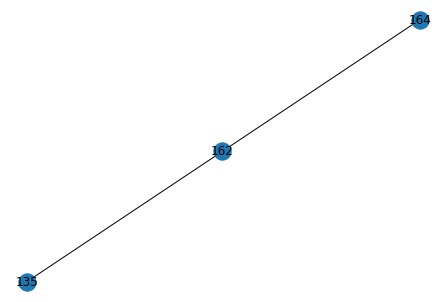

match_branches = [[135, 162]]
edges_to_delete (resolve crossover) = [[135, 164], [162, 164]]
edges_to_create (resolve crossover) = [[135, 162]]
edges_to_delete (cut_limb_network) = [array([135, 164]), array([162, 164])]
edges_to_create = [[135, 162]]
Number of connected components = 3
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {256, 257, 258, 259, 260, 261, 262, 135, 263, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 157, 162, 163, 167, 169, 264, 182, 199, 247, 204, 205, 206, 207, 211, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 248, 234, 235, 236, 233, 249, 239, 251, 240, 114, 243, 244, 245, 118, 254, 120, 246, 250, 123, 252, 253, 126, 255}
Comp 2 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10,

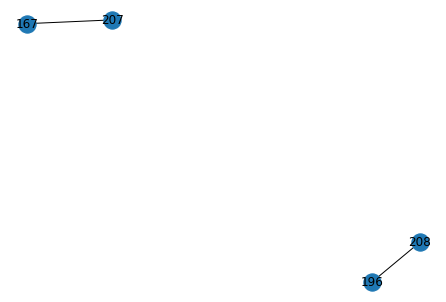

match_branches = [[167, 207], [196, 208]]
edges_to_delete (resolve crossover) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create (resolve crossover) = [[167, 207], [196, 208]]
curr_limb.deleted_edges 5 =[[167, 196], [167, 208], [196, 207], [207, 208], array([135, 164]), array([162, 164])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create = [[167, 207], [196, 208]]
Number of connected components = 3
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {256, 257, 258, 259, 260, 261, 262, 135, 263, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 157, 162, 163, 167, 169, 264, 182, 199, 247, 204, 205, 206, 207, 211, 215, 216, 219, 220, 221, 222, 223, 

  Edge: [157 163]: curr_angle = 41.95
  Edge: [163 167]: curr_angle = 16.46
  Edge: [167 207]: curr_angle = 4.53
  Edge: [207 211]: curr_angle = 44.38
  Edge: [211 206]: curr_angle = 10.86
  Edge: [206 216]: curr_angle = 28.42
  Edge: [216 226]: curr_angle = 28.14
  Edge: [226 229]: curr_angle = 31.57
  Edge: [229 230]: curr_angle = 8.52
  Edge: [230 231]: curr_angle = 25.48
  Edge: [231 232]: curr_angle = 25.74
  Edge: [232 234]: curr_angle = 23.87

Total time for doubling_back = 4.144985914230347

Attempting the width jump check (attempting from both sides)
  Edge: [157 163]: jump = -80.29
  Edge: [163 167]: jump = -89.55
  Edge: [167 207]: jump = 217.54
Adding error edge [167 207] because width jump was 217.5414217953262
  Edge: [207 211]: jump = -290.21
  Edge: [211 206]: jump = 16.19
  Edge: [206 216]: jump = 124.26
  Edge: [216 226]: jump = 361.18
Adding error edge [216 226] because width jump was 361.17564720140984
  Edge: [226 229]: jump = 77.1
  Edge: [229 230]: jump = 31.69
 

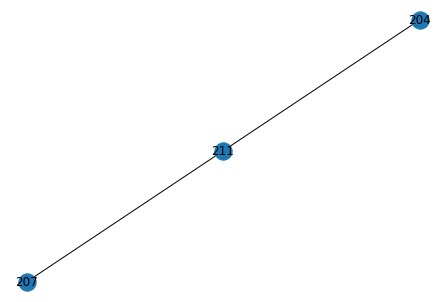

match_branches = []
edges_to_delete (resolve crossover) = [[204, 207], [204, 211], [207, 211]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([204, 207]), array([204, 211]), array([207, 211])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {162, 163, 167, 135, 207, 114, 118, 120, 123, 157, 126}
Comp 2 = {204}
Comp 3 = {256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 169, 182, 199, 205, 206, 211, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 239, 240, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255}
Comp 4 = {0, 1, 3, 

  Edge: [35 28]: curr_angle = 28.31
  Edge: [28 23]: curr_angle = 30.61
  Edge: [23 13]: curr_angle = 53.75
  Edge: [13 12]: curr_angle = 137.84
  Edge: [12 16]: curr_angle = 19.12
  Edge: [16 19]: curr_angle = 16.21
  Edge: [19 40]: curr_angle = 64.32

Total time for doubling_back = 0.35954952239990234
There were 1 edges that passed doubling back threshold of 100
Winning edge [13 12] had a doubling back of 137.8398206733082
***inside resolve crossover!!!!****
coordinate_branches = [1, 12, 13]
1 = red
12 = aqua
13 = purple
Angle between 1 and 12 = 10.28 
Angle between 1 and 13 = 47.33 
Angle between 12 and 13 = 137.28 
Final Matches = [[1, 12]]
matched_branches_revised = [[1, 12]]
Original graph


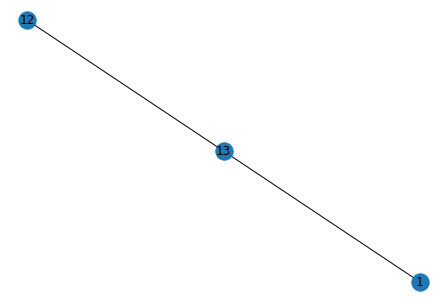

match_branches = [[1, 12]]
edges_to_delete (resolve crossover) = [[1, 13], [12, 13]]
edges_to_create (resolve crossover) = [[1, 12]]
edges_to_delete (cut_limb_network) = [array([ 1, 13]), array([12, 13])]
edges_to_create = [[1, 12]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 18, 19, 24, 25, 27, 29, 31, 32, 33, 34, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76}
Comp 1 = {35, 36, 37, 7, 10, 42, 13, 14, 45, 17, 20, 21, 22, 23, 26, 28, 30}
curr_limb_copy.deleted_edges = [array([ 1, 13]), array([12, 13])]
curr_limb_copy.created_edges = [[1, 12]]
After get best cut: cut_edges = [array([ 1, 13]), array([12, 13])], added_edges = [[1, 12]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL

  Edge: [40 39]: curr_angle = 20.39
  Edge: [39 38]: curr_angle = 14.97
  Edge: [38 41]: curr_angle = 8.77
  Edge: [41 43]: curr_angle = 14.43
  Edge: [43 46]: curr_angle = 48.69
  Edge: [46 48]: curr_angle = 32.78
  Edge: [48 57]: curr_angle = 18.91
  Edge: [57 59]: curr_angle = 32.5
  Edge: [59 62]: curr_angle = 7.92
  Edge: [62 63]: curr_angle = 43.32
  Edge: [63 65]: curr_angle = 33.85
  Edge: [65 70]: curr_angle = 28.7
  Edge: [70 69]: curr_angle = 28.16
  Edge: [69 71]: curr_angle = 6.92
  Edge: [71 73]: curr_angle = 27.22

Total time for doubling_back = 2.3877556324005127

Attempting the width jump check (attempting from both sides)
  Edge: [40 39]: jump = -220.18
  Edge: [39 38]: jump = -224.93
  Edge: [38 41]: jump = -46.67
  Edge: [41 43]: jump = -87.62
  Edge: [43 46]: jump = -211.17
  Edge: [46 48]: jump = -220.72
  Edge: [48 57]: jump = -23.29
  Edge: [57 59]: jump = 12.87
  Edge: [59 62]: jump = 71.28
  Edge: [62 63]: jump = 61.34
  Edge: [63 65]: jump = 390.67
Adding err

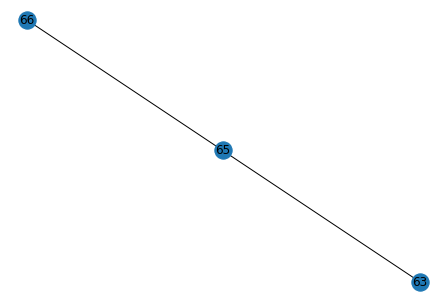

match_branches = [[65, 66]]
edges_to_delete (resolve crossover) = [[63, 65], [63, 66]]
edges_to_create (resolve crossover) = [[65, 66]]
edges_to_delete (cut_limb_network) = [array([63, 65]), array([63, 66])]
edges_to_create = [[65, 66]]
Number of connected components = 3
Comp 0 = {64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 52, 54, 55}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 18, 19, 24, 25, 27, 29, 31, 32, 33, 34, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 53, 56, 57, 58, 59, 60, 61, 62, 63}
Comp 2 = {35, 36, 37, 7, 10, 42, 13, 14, 45, 17, 20, 21, 22, 23, 26, 28, 30}
curr_limb_copy.deleted_edges = [array([ 1, 13]), array([12, 13]), array([63, 65]), array([63, 66])]
curr_limb_copy.created_edges = [[1, 12], [65, 66]]
After get best cut: cut_edges = [array([63, 65]), array([63, 66])], added_edges = [[65, 66]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total

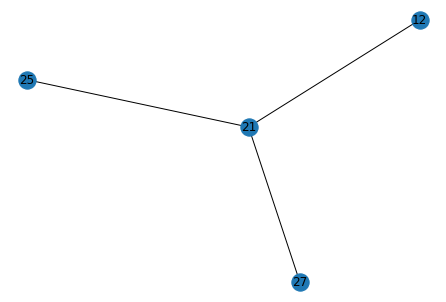

match_branches = [[12, 27]]
edges_to_delete (resolve crossover) = [[12, 21], [12, 25], [21, 25], [21, 27], [25, 27]]
edges_to_create (resolve crossover) = [[12, 27]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[12, 21], [12, 25], [21, 25], [21, 27], [25, 27]]
edges_to_create = [[12, 27]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 4, 7, 8, 10, 11, 12, 13, 14, 27}
Comp 1 = {3, 5, 6, 9, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 2 = {25}
curr_limb_copy.deleted_edges = [[12, 21], [12, 25], [21, 25], [21, 27], [25, 27]]
curr_limb_copy.created_edges = [[12, 27]]
After get best cut: cut_edges = [[12, 21], [12, 25], [21, 25], [21, 27], [25, 27]], added_edges = [[12, 27]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the s

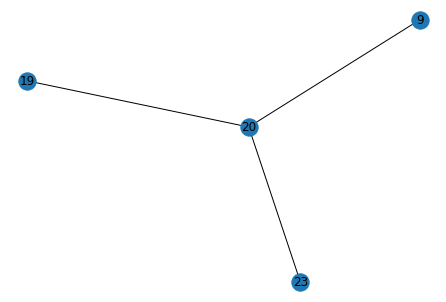

match_branches = [[19, 20]]
edges_to_delete (resolve crossover) = [[9, 19], [9, 20], [9, 23], [19, 23], [20, 23]]
edges_to_create (resolve crossover) = [[19, 20]]
curr_limb.deleted_edges 5 =[[12, 21], [12, 25], [21, 25], [21, 27], [25, 27]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[9, 19], [9, 20], [9, 23], [19, 23], [20, 23]]
edges_to_create = [[19, 20]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 4, 7, 8, 10, 11, 12, 13, 14, 27}
Comp 1 = {5, 15, 16, 17, 18, 19, 20, 21}
Comp 2 = {25}
Comp 3 = {9}
Comp 4 = {3, 6, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 5 = {22}
curr_limb_copy.deleted_edges = [[12, 21], [12, 25], [21, 25], [21, 27], [25, 27], [9, 19], [9, 20], [9, 23], [19, 23], [20, 23]]
curr_limb_copy.created_edges = [[12, 27], [19, 20]]
After get best cut: cut_edges = [[9, 19], [9, 20], [9, 23], [19, 23], [20, 23]], added_edges = [[19, 20

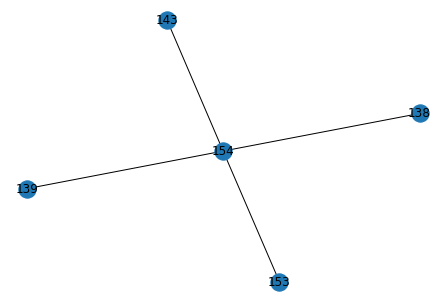

match_branches = [[143, 153]]
edges_to_delete (resolve crossover) = [[138, 139], [138, 143], [138, 153], [138, 154], [139, 143], [139, 153], [139, 154], [143, 154], [153, 154]]
edges_to_create (resolve crossover) = [[143, 153]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[138, 139], [138, 143], [138, 153], [138, 154], [139, 143], [139, 153], [139, 154], [143, 154], [153, 154]]
edges_to_create = [[143, 153]]
Number of connected components = 7
Comp 0 = {138}
Comp 1 = {1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 17, 18, 19, 22, 23, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 51, 54, 56, 57, 58, 59, 61, 62, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 76, 77, 78, 80, 81, 82, 90, 93, 94, 96, 97, 98, 99, 100, 102, 106, 112, 113, 114, 115, 125, 126, 127, 136, 139, 156, 157, 181, 188, 189, 190, 192, 194, 195, 196, 212, 213, 214, 222, 223, 224, 225, 226, 227, 228, 229, 232, 233, 234, 235, 237, 238, 239, 240}
Comp 2 = {107, 7

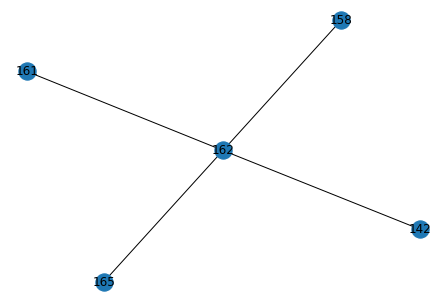

match_branches = []
edges_to_delete (resolve crossover) = [[142, 158], [142, 161], [142, 162], [142, 165], [158, 161], [158, 162], [158, 165], [161, 162], [161, 165], [162, 165]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[138, 139], [138, 143], [138, 153], [138, 154], [139, 143], [139, 153], [139, 154], [143, 154], [153, 154]]
Skipping endnode 161 because skeletal distance was 1264.6496614280134 and threshold was 2500
skip_nodes = [161]
edges_to_delete (cut_limb_network) = [[142, 158], [142, 161], [142, 162], [142, 165], [158, 161], [158, 162], [158, 165], [161, 162], [161, 165], [162, 165]]
edges_to_create = []
Number of connected components = 11
Comp 0 = {138}
Comp 1 = {1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 17, 18, 19, 22, 23, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 51, 54, 56, 57, 58, 59, 61, 62, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 76, 77, 78, 80, 81, 82, 90, 93, 94, 96, 97, 98, 99, 100, 102, 106, 112, 113,

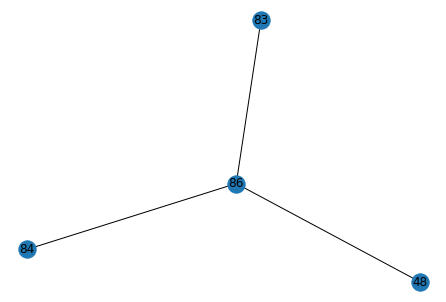

match_branches = [[83, 84], [48, 86]]
edges_to_delete (resolve crossover) = [[48, 83], [48, 84], [83, 86], [84, 86]]
edges_to_create (resolve crossover) = [[83, 84], [48, 86]]
curr_limb.deleted_edges 5 =[[138, 139], [138, 143], [138, 153], [138, 154], [139, 143], [139, 153], [139, 154], [143, 154], [153, 154], [142, 158], [142, 161], [142, 162], [142, 165], [158, 161], [158, 162], [158, 165], [161, 162], [161, 165], [162, 165]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[48, 83], [48, 84], [83, 86], [84, 86]]
edges_to_create = [[83, 84], [48, 86]]
Number of connected components = 13
Comp 0 = {138}
Comp 1 = {1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 17, 18, 19, 22, 23, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 51, 54, 56, 57, 58, 59, 61, 62, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 76, 77, 78, 80, 81, 82, 90, 93, 94, 96, 97, 98, 99, 100, 102, 106, 112, 113, 114, 115, 125, 126, 127, 136, 139, 156, 157, 181, 188, 189, 190, 192, 194, 195, 1

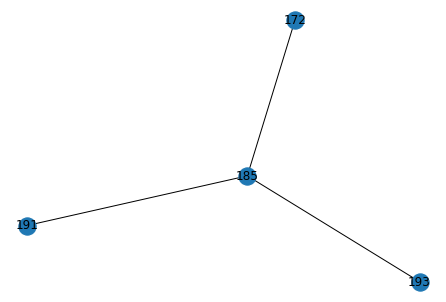

match_branches = [[172, 191]]
edges_to_delete (resolve crossover) = [[172, 185], [172, 193], [185, 191], [185, 193], [191, 193]]
edges_to_create (resolve crossover) = [[172, 191]]
curr_limb.deleted_edges 5 =[[138, 139], [138, 143], [138, 153], [138, 154], [139, 143], [139, 153], [139, 154], [143, 154], [153, 154], [142, 158], [142, 161], [142, 162], [142, 165], [158, 161], [158, 162], [158, 165], [161, 162], [161, 165], [162, 165], [48, 83], [48, 84], [83, 86], [84, 86]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[172, 185], [172, 193], [185, 191], [185, 193], [191, 193]]
edges_to_create = [[172, 191]]
Number of connected components = 15
Comp 0 = {138}
Comp 1 = {1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 17, 18, 19, 22, 23, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 51, 54, 56, 57, 58, 59, 61, 62, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 76, 77, 78, 80, 81, 82, 90, 93, 94, 96, 97, 98, 99, 100, 102, 106, 112, 113, 114, 115, 125, 126, 127, 

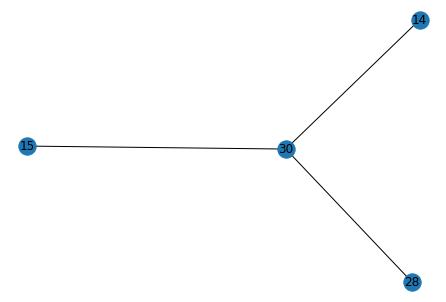

match_branches = [[15, 30], [14, 28]]
edges_to_delete (resolve crossover) = [[14, 15], [14, 30], [15, 28], [28, 30]]
edges_to_create (resolve crossover) = [[15, 30], [14, 28]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[14, 15], [14, 30], [15, 28], [28, 30]]
edges_to_create = [[15, 30], [14, 28]]
Number of connected components = 3
Comp 0 = {1, 2, 35, 4, 37, 6, 3, 13, 14, 25, 27, 28}
Comp 1 = {0, 5, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 30, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62}
Comp 2 = {29}
curr_limb_copy.deleted_edges = [[14, 15], [14, 30], [15, 28], [28, 30]]
curr_limb_copy.created_edges = [[15, 30], [14, 28]]
After get best cut: cut_edges = [[14, 15], [14, 30], [15, 28], [28, 30]], added_edges = [[15, 30], [14, 28]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the

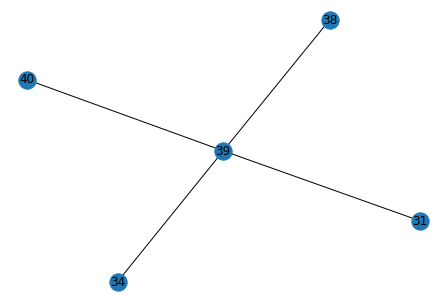

match_branches = [[31, 39]]
edges_to_delete (resolve crossover) = [[31, 34], [31, 38], [31, 40], [34, 38], [34, 39], [34, 40], [38, 39], [38, 40], [39, 40]]
edges_to_create (resolve crossover) = [[31, 39]]
curr_limb.deleted_edges 5 =[[14, 15], [14, 30], [15, 28], [28, 30]]
Skipping endnode 41 because skeletal distance was 1520.066350310799 and threshold was 2500
skip_nodes = [41]
edges_to_delete (cut_limb_network) = [[31, 34], [31, 38], [31, 40], [34, 38], [34, 39], [34, 40], [38, 39], [38, 40], [39, 40]]
edges_to_create = [[31, 39]]
Number of connected components = 6
Comp 0 = {1, 2, 35, 4, 37, 6, 3, 13, 14, 25, 27, 28}
Comp 1 = {33, 7, 39, 9, 10, 15, 16, 30, 31}
Comp 2 = {32, 34, 12, 22, 24}
Comp 3 = {5, 8, 11, 17, 18, 19, 20, 21, 23, 26, 36, 38, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62}
Comp 4 = {40, 0, 41}
Comp 5 = {29}
curr_limb_copy.deleted_edges = [[14, 15], [14, 30], [15, 28], [28, 30], [31, 34], [31, 38], [31, 40], [34, 38], [34, 39], [

  Edge: [44 47]: curr_angle = 32.61
  Edge: [47 21]: curr_angle = 63.34
  Edge: [21 49]: curr_angle = 91.4
  Edge: [49 52]: curr_angle = 131.01
  Edge: [52 55]: curr_angle = 75.49
  Edge: [55 50]: curr_angle = 68.03

Total time for doubling_back = 0.33635592460632324
There were 1 edges that passed doubling back threshold of 100
Winning edge [49 52] had a doubling back of 131.00573501427414
***inside resolve crossover!!!!****
coordinate_branches = [49, 52, 53]
49 = red
52 = aqua
53 = purple
Angle between 49 and 52 = 149.63 
Angle between 49 and 53 = 28.53 
Angle between 52 and 53 = 28.16 
Final Matches = [[49, 53], [52, 53]]
matched_branches_revised = [[52, 53]]
Original graph


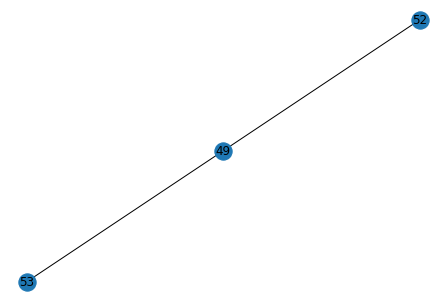

match_branches = [[52, 53]]
edges_to_delete (resolve crossover) = [[49, 52], [49, 53]]
edges_to_create (resolve crossover) = [[52, 53]]
edges_to_delete (cut_limb_network) = [array([49, 52]), array([49, 53])]
edges_to_create = [[52, 53]]
Number of connected components = 7
Comp 0 = {1, 2, 35, 4, 37, 6, 3, 13, 14, 25, 27, 28}
Comp 1 = {33, 7, 39, 9, 10, 15, 16, 30, 31}
Comp 2 = {32, 34, 12, 22, 24}
Comp 3 = {36, 5, 38, 8, 42, 11, 44, 43, 45, 47, 48, 17, 18, 49, 20, 21, 46, 23, 26}
Comp 4 = {40, 0, 41}
Comp 5 = {58, 50, 19, 52, 53, 51, 55, 54, 57, 56, 59, 60, 61, 62}
Comp 6 = {29}
curr_limb_copy.deleted_edges = [[14, 15], [14, 30], [15, 28], [28, 30], [31, 34], [31, 38], [31, 40], [34, 38], [34, 39], [34, 40], [38, 39], [38, 40], [39, 40], array([49, 52]), array([49, 53])]
curr_limb_copy.created_edges = [[15, 30], [14, 28], [31, 39], [52, 53]]
After get best cut: cut_edges = [array([49, 52]), array([49, 53])], added_edges = [[52, 53]]
total_soma_paths_to_cut = []
-----------counter = 0----

  Edge: [30 18]: curr_angle = 53.09
  Edge: [18 14]: curr_angle = 72.71
  Edge: [14 15]: curr_angle = 85.61
  Edge: [15 23]: curr_angle = 46.6
  Edge: [23 33]: curr_angle = 65.25
  Edge: [33 34]: curr_angle = 41.14

Total time for doubling_back = 0.2973453998565674

Attempting the width jump check (attempting from both sides)
  Edge: [30 18]: jump = -144.37
  Edge: [18 14]: jump = -150.88
  Edge: [14 15]: jump = -52.23
  Edge: [15 23]: jump = 149.62
  Edge: [23 33]: jump = 275.31
Adding error edge [23 33] because width jump was 275.3100832679396
  Edge: [33 34]: jump = 328.4
Adding error edge [33 34] because width jump was 328.4032685725992
Total time for width = 0.24785947799682617
Path starting at 30 had err_edges: [[23, 33], [33, 34]]
  Edge: [34 33]: jump = 16.71
  Edge: [33 23]: jump = -290.49
  Edge: [23 15]: jump = -149.62
  Edge: [15 14]: jump = 52.23
  Edge: [14 18]: jump = 168.08
  Edge: [18 30]: jump = 144.37
Total time for width = 0.2652249336242676
Path starting at 34 had 

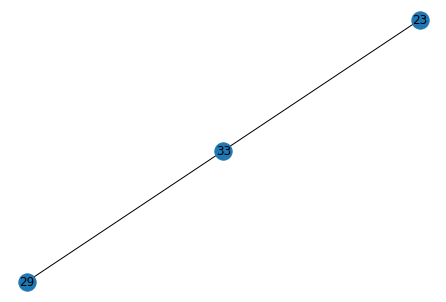

match_branches = [[29, 33]]
edges_to_delete (resolve crossover) = [[23, 29], [23, 33]]
edges_to_create (resolve crossover) = [[29, 33]]
edges_to_delete (cut_limb_network) = [array([23, 29]), array([23, 33])]
edges_to_create = [[29, 33]]
Number of connected components = 2
Comp 0 = {0, 1, 3, 6, 10, 11, 12, 13, 19, 20, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38}
Comp 1 = {2, 4, 5, 7, 8, 9, 14, 15, 16, 17, 18, 21, 22, 23, 30}
curr_limb_copy.deleted_edges = [array([23, 29]), array([23, 33])]
curr_limb_copy.created_edges = [[29, 33]]
After get best cut: cut_edges = [array([23, 29]), array([23, 33])], added_edges = [[29, 33]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection


---- working on disconnecting 30 and 38
---- This disconnects S0_2 from S0_0  
 Cut iterat

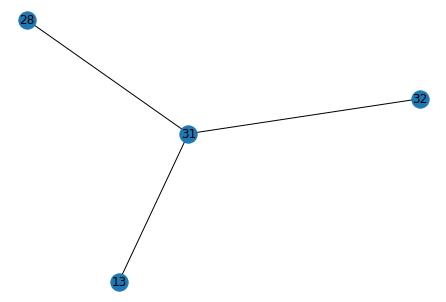

match_branches = [[28, 32], [13, 31]]
edges_to_delete (resolve crossover) = [[13, 28], [13, 32], [28, 31], [31, 32]]
edges_to_create (resolve crossover) = [[28, 32], [13, 31]]
curr_limb.deleted_edges 5 =[array([23, 29]), array([23, 33])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[13, 28], [13, 32], [28, 31], [31, 32]]
edges_to_create = [[28, 32], [13, 31]]
Number of connected components = 3
Comp 0 = {32, 35, 36, 3, 38, 37, 12, 19, 25, 26, 27, 28}
Comp 1 = {0, 1, 34, 33, 6, 10, 11, 13, 20, 24, 29, 31}
Comp 2 = {2, 4, 5, 7, 8, 9, 14, 15, 16, 17, 18, 21, 22, 23, 30}
curr_limb_copy.deleted_edges = [array([23, 29]), array([23, 33]), [13, 28], [13, 32], [28, 31], [31, 32]]
curr_limb_copy.created_edges = [[29, 33], [28, 32], [13, 31]]
After get best cut: cut_edges = [[13, 28], [13, 32], [28, 31], [31, 32]], added_edges = [[28, 32], [13, 31]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECT

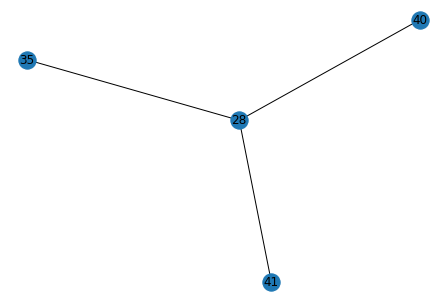

match_branches = [[28, 41], [35, 40]]
edges_to_delete (resolve crossover) = [[28, 35], [28, 40], [35, 41], [40, 41]]
edges_to_create (resolve crossover) = [[28, 41], [35, 40]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[28, 35], [28, 40], [35, 41], [40, 41]]
edges_to_create = [[28, 41], [35, 40]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 41}
Comp 1 = {9, 26, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 2 = {37}
curr_limb_copy.deleted_edges = [[28, 35], [28, 40], [35, 41], [40, 41]]
curr_limb_copy.created_edges = [[28, 41], [35, 40]]
After get best cut: cut_edges = [[28, 35], [28, 40], [35, 41], [40, 41]], added_edges = [[28, 41], [35, 40]]
total_soma_paths_to_cut = []
-----------c

  Edge: [60 58]: curr_angle = 24.85
  Edge: [58 54]: curr_angle = 29.51
  Edge: [54 52]: curr_angle = 48.69
  Edge: [52 33]: curr_angle = 13.71
  Edge: [33 31]: curr_angle = 30.46
  Edge: [31 36]: curr_angle = 90.26
  Edge: [36 38]: curr_angle = 72.14
  Edge: [38 67]: curr_angle = 11.07
  Edge: [67 68]: curr_angle = 37.15
  Edge: [68 70]: curr_angle = 46.29

Total time for doubling_back = 1.4320101737976074

Attempting the width jump check (attempting from both sides)
  Edge: [60 58]: jump = -120.24
  Edge: [58 54]: jump = 3.91
  Edge: [54 52]: jump = -94.03
  Edge: [52 33]: jump = -127.17
  Edge: [33 31]: jump = -32.5
  Edge: [31 36]: jump = 45.06
  Edge: [36 38]: jump = 271.97
Adding error edge [36 38] because width jump was 271.96868872259677
  Edge: [38 67]: jump = 114.05
  Edge: [67 68]: jump = 10.47
  Edge: [68 70]: jump = 294.5
Adding error edge [68 70] because width jump was 294.4950900973778
Total time for width = 1.3981544971466064
Path starting at 60 had err_edges: [[36, 38]

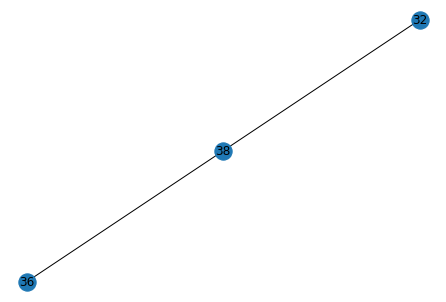

match_branches = [[32, 38]]
edges_to_delete (resolve crossover) = [[32, 36], [36, 38]]
edges_to_create (resolve crossover) = [[32, 38]]
edges_to_delete (cut_limb_network) = [array([32, 36]), array([36, 38])]
edges_to_create = [[32, 38]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 41}
Comp 1 = {29, 31, 33, 34, 35, 36, 39, 40, 42, 43, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64}
Comp 2 = {9, 26, 30, 32, 38, 49, 51, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 3 = {37}
curr_limb_copy.deleted_edges = [[28, 35], [28, 40], [35, 41], [40, 41], array([32, 36]), array([36, 38])]
curr_limb_copy.created_edges = [[28, 41], [35, 40], [32, 38]]
After get best cut: cut_edges = [array([32, 36]), array([36, 38])], added_edges = [[32, 38]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs a

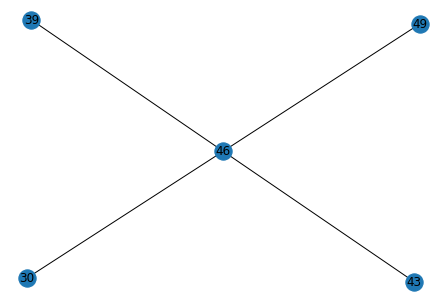

match_branches = [[43, 46]]
edges_to_delete (resolve crossover) = [[30, 39], [30, 43], [30, 46], [30, 49], [39, 43], [39, 46], [39, 49], [43, 49], [46, 49]]
edges_to_create (resolve crossover) = [[43, 46]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 50 because skeletal distance was 1902.0353170941155 and threshold was 2500
skip_nodes = [50]
edges_to_delete (cut_limb_network) = [[30, 39], [30, 43], [30, 46], [30, 49], [39, 43], [39, 46], [39, 49], [43, 49], [46, 49]]
edges_to_create = [[43, 46]]
Number of connected components = 6
Comp 0 = {65, 66, 4, 39, 8, 42, 12, 59, 60, 61, 62}
Comp 1 = {1, 30, 31}
Comp 2 = {0, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 26, 27, 28, 29, 32, 33, 37, 41, 43, 44, 45, 46, 50, 51, 52, 53, 54, 55, 56, 57, 58, 67, 68}
Comp 3 = {64, 34, 35, 36, 38, 40, 49, 20, 22, 25, 63}
Comp 4 = {47}
Comp 5 = {48}
curr_limb_copy.deleted_edges = [[30, 39], [30, 43], [30, 46], [30, 49], [39, 43], [39, 46], [39, 49], [43, 49], [46, 49]]
curr_limb_copy

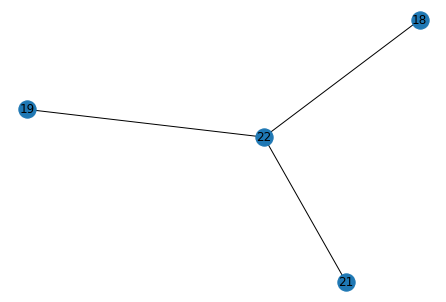

match_branches = [[19, 22]]
edges_to_delete (resolve crossover) = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
edges_to_create (resolve crossover) = [[19, 22]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 22 because skeletal distance was 1712.4626895413483 and threshold was 2500
skip_nodes = [22]
edges_to_delete (cut_limb_network) = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
edges_to_create = [[19, 22]]
Number of connected components = 4
Comp 0 = {6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19, 22, 23, 24, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}
Comp 1 = {0, 1, 2, 3, 4, 5, 12, 16, 18}
Comp 2 = {25, 29, 21, 30}
Comp 3 = {20}
curr_limb_copy.deleted_edges = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
curr_limb_copy.created_edges = [[19, 22]]
After get best cut: cut_edges = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]], added_edges = [[19, 22]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cu

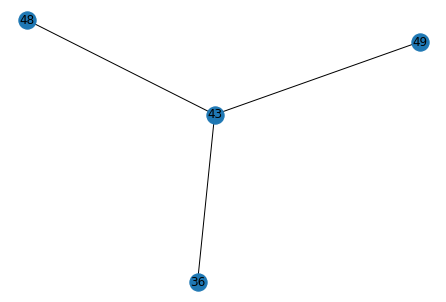

match_branches = [[43, 48]]
edges_to_delete (resolve crossover) = [[36, 43], [36, 48], [36, 49], [43, 49], [48, 49]]
edges_to_create (resolve crossover) = [[43, 48]]
curr_limb.deleted_edges 5 =[[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
Skipping endnode 22 because skeletal distance was 1712.4626895413483 and threshold was 2500
skip_nodes = [22]
edges_to_delete (cut_limb_network) = [[36, 43], [36, 48], [36, 49], [43, 49], [48, 49]]
edges_to_create = [[43, 48]]
Number of connected components = 6
Comp 0 = {6, 7, 8, 9, 10, 13, 14, 15, 17, 24, 26, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 51, 52}
Comp 1 = {43, 44, 11, 48, 19, 22, 23, 27, 28}
Comp 2 = {49, 50, 47}
Comp 3 = {0, 1, 2, 3, 4, 5, 12, 16, 18}
Comp 4 = {25, 29, 21, 30}
Comp 5 = {20}
curr_limb_copy.deleted_edges = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22], [36, 43], [36, 48], [36, 49], [43, 49], [48, 49]]
curr_limb_copy.created_edges = [[19, 22], [43, 48]]
After get best cut: cut_edges = [[36, 43], [36, 

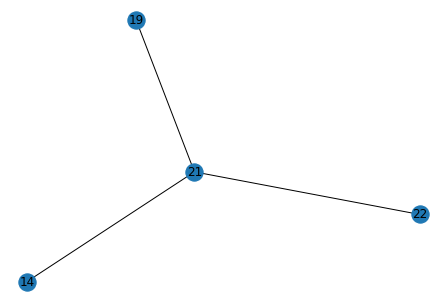

match_branches = [[19, 22], [14, 21]]
edges_to_delete (resolve crossover) = [[14, 19], [14, 22], [19, 21], [21, 22]]
edges_to_create (resolve crossover) = [[19, 22], [14, 21]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 34 because skeletal distance was 179.81124243568593 and threshold was 2500
skip_nodes = [34]
edges_to_delete (cut_limb_network) = [[14, 19], [14, 22], [19, 21], [21, 22]]
edges_to_create = [[19, 22], [14, 21]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 22, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78}
Comp 1 = {9, 14, 21, 23, 25, 26}
Comp 2 = {20}
Comp 3 = {63}
curr_limb_copy.deleted_edges = [[14, 19], [14, 22], [19, 21], [21, 22]]
curr_limb_copy.created_edges = [[19, 22], [14, 21]]
After get best cut: cut_edges = [[14, 19], [14, 22], [19, 21],

  Edge: [0 1]: curr_angle = 43.35
  Edge: [1 8]: curr_angle = 46.36
  Edge: [8 7]: curr_angle = 79.51
  Edge: [ 7 11]: curr_angle = 36.22
  Edge: [11 10]: curr_angle = 47.63

Total time for doubling_back = 0.6181514263153076

Attempting the width jump check (attempting from both sides)
  Edge: [0 1]: jump = -148.12
  Edge: [1 8]: jump = 162.55
  Edge: [8 7]: jump = 96.16
  Edge: [ 7 11]: jump = 149.11
  Edge: [11 10]: jump = 294.44
Adding error edge [11 10] because width jump was 294.4381743139495
Total time for width = 0.5224502086639404
Path starting at 0 had err_edges: [[11, 10]]
  Edge: [10 11]: jump = -294.44
  Edge: [11  7]: jump = -149.11
  Edge: [7 8]: jump = 124.16
  Edge: [8 1]: jump = -84.1
  Edge: [1 0]: jump = 148.12
Total time for width = 0.5036602020263672
Path starting at 10 had err_edges: []
first_error_sizes = [294.4381743139495, -inf], winning_path = 0
***inside resolve crossover!!!!****
coordinate_branches = [10, 11, 13]
10 = red
11 = aqua
13 = purple
Angle between 

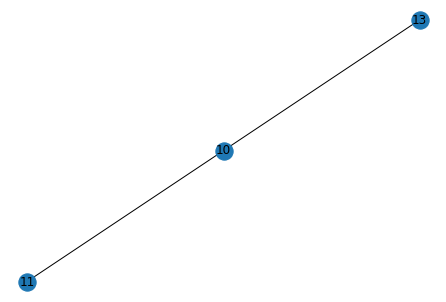

match_branches = []
edges_to_delete (resolve crossover) = [[10, 11], [10, 13], [11, 13]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([10, 11]), array([10, 13]), array([11, 13])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {10}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62}
Comp 2 = {40, 41, 13, 14, 15, 51, 52}
curr_limb_copy.deleted_edges = [array([10, 11]), array([10, 13]), array([11, 13])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([10, 11]), array([10, 13]), array([11, 13])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path 

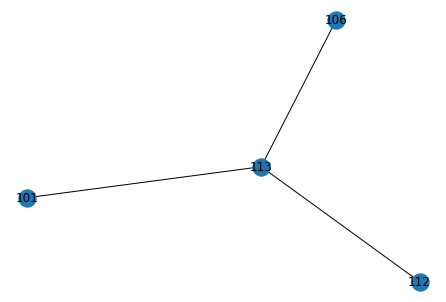

match_branches = [[106, 112]]
edges_to_delete (resolve crossover) = [[101, 106], [101, 112], [101, 113], [106, 113], [112, 113]]
edges_to_create (resolve crossover) = [[106, 112]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[101, 106], [101, 112], [101, 113], [106, 113], [112, 113]]
edges_to_create = [[106, 112]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34.0, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 107, 108, 109, 110, 113, 114, 117, 118, 119, 120, 121, 122, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 15

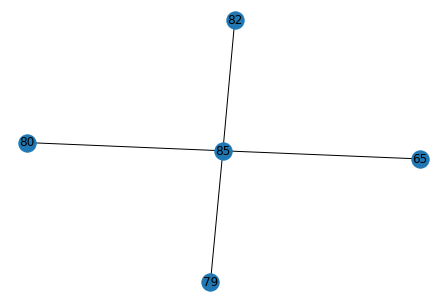

match_branches = [[79, 85], [65, 82]]
edges_to_delete (resolve crossover) = [[65, 79], [65, 80], [65, 85], [79, 80], [79, 82], [80, 82], [80, 85], [82, 85]]
edges_to_create (resolve crossover) = [[79, 85], [65, 82]]
curr_limb.deleted_edges 5 =[[101, 106], [101, 112], [101, 113], [106, 113], [112, 113]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[65, 79], [65, 80], [65, 85], [79, 80], [79, 82], [80, 82], [80, 85], [82, 85]]
edges_to_create = [[79, 85], [65, 82]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34.0, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 97, 98, 99, 102, 103, 104, 105, 107, 108, 109, 110, 113, 114, 117, 118, 119, 120, 121, 122, 125, 126, 127, 128, 129, 1

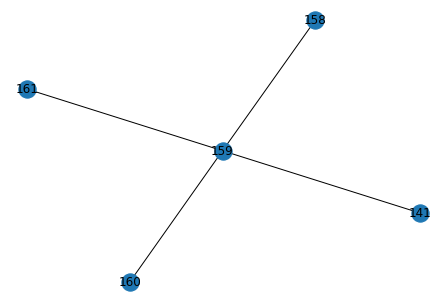

match_branches = [[141, 158]]
edges_to_delete (resolve crossover) = [[141, 159], [141, 160], [141, 161], [158, 159], [158, 160], [158, 161], [159, 160], [159, 161], [160, 161]]
edges_to_create (resolve crossover) = [[141, 158]]
curr_limb.deleted_edges 5 =[[101, 106], [101, 112], [101, 113], [106, 113], [112, 113], [65, 79], [65, 80], [65, 85], [79, 80], [79, 82], [80, 82], [80, 85], [82, 85]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[141, 159], [141, 160], [141, 161], [158, 159], [158, 160], [158, 161], [159, 160], [159, 161], [160, 161]]
edges_to_create = [[141, 158]]
Number of connected components = 9
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34.0, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 97, 98

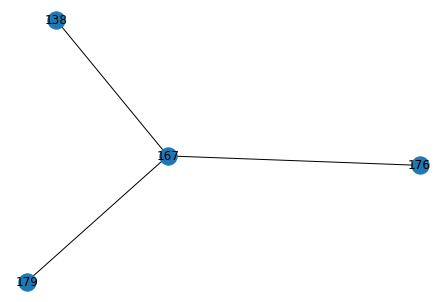

match_branches = [[167, 176], [138, 179]]
edges_to_delete (resolve crossover) = [[138, 167], [138, 176], [167, 179], [176, 179]]
edges_to_create (resolve crossover) = [[167, 176], [138, 179]]
curr_limb.deleted_edges 5 =[[101, 106], [101, 112], [101, 113], [106, 113], [112, 113], [65, 79], [65, 80], [65, 85], [79, 80], [79, 82], [80, 82], [80, 85], [82, 85], [141, 159], [141, 160], [141, 161], [158, 159], [158, 160], [158, 161], [159, 160], [159, 161], [160, 161]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[138, 167], [138, 176], [167, 179], [176, 179]]
edges_to_create = [[167, 176], [138, 179]]
Number of connected components = 11
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34.0, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 84, 85, 86, 87, 89, 9

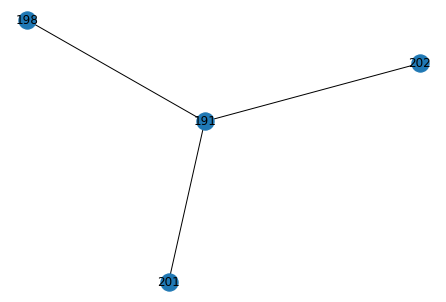

match_branches = [[198, 202], [191, 201]]
edges_to_delete (resolve crossover) = [[191, 198], [191, 202], [198, 201], [201, 202]]
edges_to_create (resolve crossover) = [[198, 202], [191, 201]]
curr_limb.deleted_edges 5 =[[101, 106], [101, 112], [101, 113], [106, 113], [112, 113], [65, 79], [65, 80], [65, 85], [79, 80], [79, 82], [80, 82], [80, 85], [82, 85], [141, 159], [141, 160], [141, 161], [158, 159], [158, 160], [158, 161], [159, 160], [159, 161], [160, 161], [138, 167], [138, 176], [167, 179], [176, 179]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[191, 198], [191, 202], [198, 201], [201, 202]]
edges_to_create = [[198, 202], [191, 201]]
Number of connected components = 12
Comp 0 = {0, 2, 3, 8, 10, 12, 13, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34.0, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 64, 65, 70, 72, 82, 87, 89, 99, 102, 103, 104, 110, 114, 117, 118, 119, 120, 128, 134, 135, 136, 137, 1

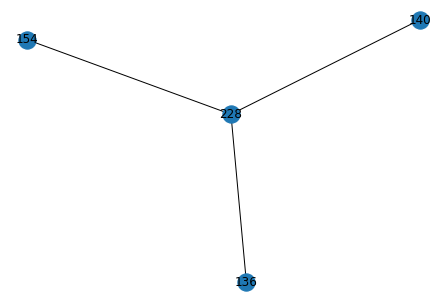

match_branches = [[136, 140]]
edges_to_delete (resolve crossover) = [[136, 154], [136, 228], [140, 154], [140, 228], [154, 228]]
edges_to_create (resolve crossover) = [[136, 140]]
curr_limb.deleted_edges 5 =[[101, 106], [101, 112], [101, 113], [106, 113], [112, 113], [65, 79], [65, 80], [65, 85], [79, 80], [79, 82], [80, 82], [80, 85], [82, 85], [141, 159], [141, 160], [141, 161], [158, 159], [158, 160], [158, 161], [159, 160], [159, 161], [160, 161], [138, 167], [138, 176], [167, 179], [176, 179], [191, 198], [191, 202], [198, 201], [201, 202]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[136, 154], [136, 228], [140, 154], [140, 228], [154, 228]]
edges_to_create = [[136, 140]]
Number of connected components = 15
Comp 0 = {0, 2, 3, 8, 10, 12, 13, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34.0, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 64, 65, 70, 72, 82, 89, 99, 102, 103, 104, 110, 114, 117, 118, 119, 120

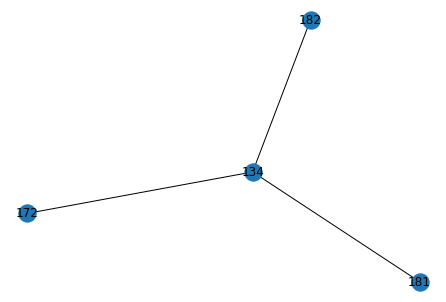

match_branches = [[134, 181]]
edges_to_delete (resolve crossover) = [[134, 172], [134, 182], [172, 181], [172, 182], [181, 182]]
edges_to_create (resolve crossover) = [[134, 181]]
curr_limb.deleted_edges 5 =[[101, 106], [101, 112], [101, 113], [106, 113], [112, 113], [65, 79], [65, 80], [65, 85], [79, 80], [79, 82], [80, 82], [80, 85], [82, 85], [141, 159], [141, 160], [141, 161], [158, 159], [158, 160], [158, 161], [159, 160], [159, 161], [160, 161], [138, 167], [138, 176], [167, 179], [176, 179], [191, 198], [191, 202], [198, 201], [201, 202], [136, 154], [136, 228], [140, 154], [140, 228], [154, 228]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[134, 172], [134, 182], [172, 181], [172, 182], [181, 182]]
edges_to_create = [[134, 181]]
Number of connected components = 17
Comp 0 = {224, 225, 169, 172, 174, 175, 177, 117, 153}
Comp 1 = {0, 2, 3, 134, 135, 8, 10, 12, 141, 142, 14, 28, 17, 146, 19, 13, 18, 150, 23, 22, 24, 26, 155, 27, 29, 158, 30, 31, 33, 34.0, 32, 35, 37, 36, 

  Edge: [31 17]: curr_angle = 52.73
  Edge: [17 14]: curr_angle = 87.28
  Edge: [14 15]: curr_angle = 146.56
  Edge: [15 25]: curr_angle = 39.54
  Edge: [25 32]: curr_angle = 69.63
  Edge: [32 35]: curr_angle = 16.71
  Edge: [35 37]: curr_angle = 31.35

Total time for doubling_back = 0.6171610355377197
There were 1 edges that passed doubling back threshold of 100
Winning edge [14 15] had a doubling back of 146.5560721382054
***inside resolve crossover!!!!****
coordinate_branches = [11, 14, 15]
11 = red
14 = aqua
15 = purple
Angle between 11 and 14 = 86.68 
Angle between 11 and 15 = 19.65 
Angle between 14 and 15 = 79.75 
Final Matches = [[11, 15]]
matched_branches_revised = [[11, 15]]
Original graph


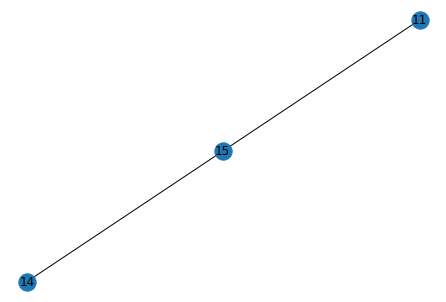

match_branches = [[11, 15]]
edges_to_delete (resolve crossover) = [[11, 14], [14, 15]]
edges_to_create (resolve crossover) = [[11, 15]]
edges_to_delete (cut_limb_network) = [array([11, 14]), array([14, 15])]
edges_to_create = [[11, 15]]
Number of connected components = 2
Comp 0 = {5, 6, 10, 13, 14, 17, 31}
Comp 1 = {0, 1, 2, 3, 4, 7, 8, 9, 11, 12, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40}
curr_limb_copy.deleted_edges = [array([11, 14]), array([14, 15])]
curr_limb_copy.created_edges = [[11, 15]]
After get best cut: cut_edges = [array([11, 14]), array([14, 15])], added_edges = [[11, 15]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 5,  6, 10, 13, 14, 17, 

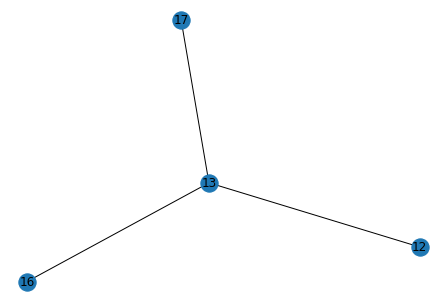

match_branches = [[13, 16], [12, 17]]
edges_to_delete (resolve crossover) = [[12, 13], [12, 16], [13, 17], [16, 17]]
edges_to_create (resolve crossover) = [[13, 16], [12, 17]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[12, 13], [12, 16], [13, 17], [16, 17]]
edges_to_create = [[13, 16], [12, 17]]
Number of connected components = 3
Comp 0 = {17, 10, 12, 14}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 16, 18, 19, 20}
Comp 2 = {15}
curr_limb_copy.deleted_edges = [[12, 13], [12, 16], [13, 17], [16, 17]]
curr_limb_copy.created_edges = [[13, 16], [12, 17]]
After get best cut: cut_edges = [[12, 13], [12, 16], [13, 17], [16, 17]], added_edges = [[13, 16], [12, 17]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of grap

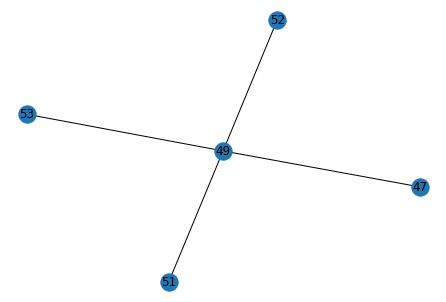

match_branches = []
edges_to_delete (resolve crossover) = [[47, 49], [47, 51], [47, 52], [47, 53], [49, 51], [49, 52], [49, 53], [51, 52], [51, 53], [52, 53]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[47, 49], [47, 51], [47, 52], [47, 53], [49, 51], [49, 52], [49, 53], [51, 52], [51, 53], [52, 53]]
edges_to_create = []
Number of connected components = 6
Comp 0 = {2, 3, 5, 6, 73, 10, 9, 49, 50, 24, 26, 27, 29, 30}
Comp 1 = {0, 1, 4, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 1

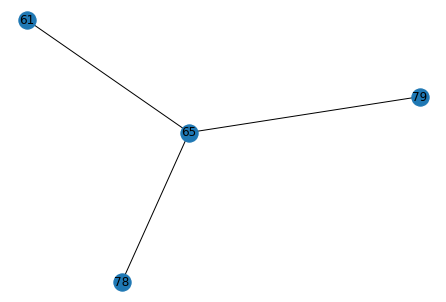

match_branches = [[65, 79]]
edges_to_delete (resolve crossover) = [[61, 65], [61, 78], [61, 79], [65, 78], [78, 79]]
edges_to_create (resolve crossover) = [[65, 79]]
curr_limb.deleted_edges 5 =[[47, 49], [47, 51], [47, 52], [47, 53], [49, 51], [49, 52], [49, 53], [51, 52], [51, 53], [52, 53]]
Skipping endnode 34 because skeletal distance was 490.650729373382 and threshold was 2500
skip_nodes = [34]
edges_to_delete (cut_limb_network) = [[61, 65], [61, 78], [61, 79], [65, 78], [78, 79]]
edges_to_create = [[65, 79]]
Number of connected components = 8
Comp 0 = {2, 3, 5, 6, 73, 10, 9, 49, 50, 24, 26, 27, 29, 30}
Comp 1 = {0, 4, 7, 8, 14, 17, 18, 22, 23, 25, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 71, 74, 77, 79, 80, 81, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 108, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,

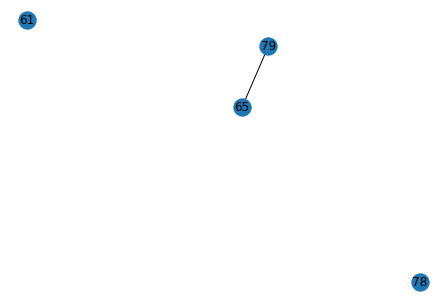

match_branches = [[65, 79]]
edges_to_delete (resolve crossover) = [[61, 65], [61, 78], [61, 79], [65, 78], [78, 79]]
edges_to_create (resolve crossover) = [[65, 79]]
curr_limb.deleted_edges 5 =[[47, 49], [47, 51], [47, 52], [47, 53], [49, 51], [49, 52], [49, 53], [51, 52], [51, 53], [52, 53], [61, 65], [61, 78], [61, 79], [65, 78], [78, 79]]
Skipping endnode 34 because skeletal distance was 490.650729373382 and threshold was 2500
skip_nodes = [34]
edges_to_delete (cut_limb_network) = [[61, 65], [61, 78], [61, 79], [65, 78], [78, 79]]
edges_to_create = [[65, 79]]
Number of connected components = 8
Comp 0 = {2, 3, 5, 6, 73, 10, 9, 49, 50, 24, 26, 27, 29, 30}
Comp 1 = {0, 4, 7, 8, 14, 17, 18, 22, 23, 25, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 71, 74, 77, 79, 80, 81, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 108, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,

  Edge: [32 37]: curr_angle = 61.89
  Edge: [37 40]: curr_angle = 45.22
  Edge: [40 56]: curr_angle = 94.89
  Edge: [56 55]: curr_angle = 100.07
  Edge: [55 59]: curr_angle = 99.76
  Edge: [59 63]: curr_angle = 162.81
  Edge: [63 65]: curr_angle = 174.94
  Edge: [65 79]: curr_angle = 14.89
  Edge: [79 86]: curr_angle = 176.69
  Edge: [86 88]: curr_angle = 159.56
  Edge: [88 91]: curr_angle = 52.89
  Edge: [91 98]: curr_angle = 161.8
  Edge: [ 98 109]: curr_angle = 25.58
  Edge: [109 113]: curr_angle = 49.81
  Edge: [113 116]: curr_angle = 31.59
  Edge: [116  58]: curr_angle = 87.82
  Edge: [58 44]: curr_angle = 55.3
  Edge: [44 38]: curr_angle = 31.95

Total time for doubling_back = 0.8444817066192627
There were 6 edges that passed doubling back threshold of 100
Winning edge [79 86] had a doubling back of 176.69087404044316
***inside resolve crossover!!!!****
coordinate_branches = [79, 81, 86]
79 = red
81 = aqua
86 = purple
Angle between 79 and 81 = 117.43 
Angle between 79 and 86 = 14

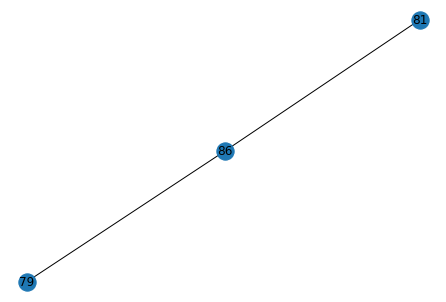

match_branches = [[79, 86]]
edges_to_delete (resolve crossover) = [[79, 81], [81, 86]]
edges_to_create (resolve crossover) = [[79, 86]]
Rejecting creating edge [79, 86] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([79, 81]), array([79, 86]), array([81, 86])]
edges_to_create = []
Number of connected components = 10
Comp 0 = {2, 3, 5, 6, 73, 10, 9, 49, 50, 24, 26, 27, 29, 30}
Comp 1 = {0, 129, 130, 131, 4, 133, 134, 7, 135, 136, 137, 132, 140, 141, 14, 138, 139, 17, 18, 22, 23, 25, 128, 28, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 55, 56, 59, 60, 62, 63, 64, 65, 66, 67, 71, 79, 80, 114, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127}
Comp 2 = {51}
Comp 3 = {52}
Comp 4 = {53}
Comp 5 = {61}
Comp 6 = {1, 11, 12, 13, 15, 16, 19, 20, 21, 54, 68, 69, 70, 72, 75, 78, 82, 83, 84, 85, 87, 104, 106, 107, 111, 112}
Comp 7 = {81, 74, 77}
Comp 8 = {8, 38, 43, 44, 57, 58, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100

  Edge: [41 40]: curr_angle = 33.55
  Edge: [40 19]: curr_angle = 10.84
  Edge: [19 45]: curr_angle = 27.86
  Edge: [45 46]: curr_angle = 28.19

Total time for doubling_back = 1.267017126083374

Attempting the width jump check (attempting from both sides)
  Edge: [41 40]: jump = -164.11
  Edge: [40 19]: jump = -113.88
  Edge: [19 45]: jump = 166.46
  Edge: [45 46]: jump = 185.56
Total time for width = 1.2430500984191895
Path starting at 41 had err_edges: []
  Edge: [46 45]: jump = -185.56
  Edge: [45 19]: jump = -166.46
  Edge: [19 40]: jump = 113.88
  Edge: [40 41]: jump = 164.11
Total time for width = 1.6417458057403564
Path starting at 46 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51}
curr_limb_copy.deleted_edges = []
curr_

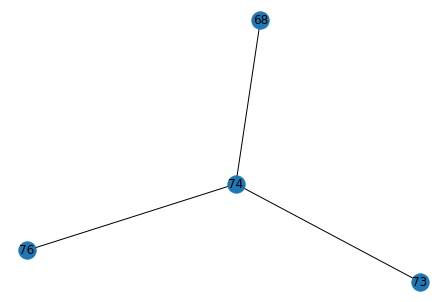

match_branches = [[73, 76]]
edges_to_delete (resolve crossover) = [[68, 73], [68, 74], [68, 76], [73, 74], [74, 76]]
edges_to_create (resolve crossover) = [[73, 76]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 76 because skeletal distance was 927.6325584784364 and threshold was 2500
Skipping endnode 84 because skeletal distance was 1315.6046278829701 and threshold was 2500
skip_nodes = [76, 84]
edges_to_delete (cut_limb_network) = [[68, 73], [68, 74], [68, 76], [73, 74], [74, 76]]
edges_to_create = [[73, 76]]
Number of connected components = 5
Comp 0 = {64, 71, 72, 73, 76, 57}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 80, 83, 91, 92}
Comp 2 = {34, 74, 75, 10, 77, 78, 79, 81, 50, 82, 84, 85, 87, 89, 90}
Comp 3 = {86}
Comp 4 = {88}
curr_limb_copy.deleted_edges = [[68

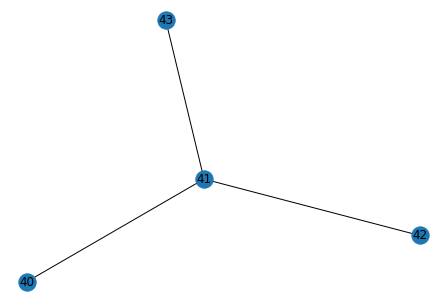

match_branches = [[41, 42]]
edges_to_delete (resolve crossover) = [[40, 41], [40, 42], [40, 43], [41, 43], [42, 43]]
edges_to_create (resolve crossover) = [[41, 42]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 73 because skeletal distance was 490.85612940208125 and threshold was 2500
skip_nodes = [73]
edges_to_delete (cut_limb_network) = [[40, 41], [40, 42], [40, 43], [41, 43], [42, 43]]
edges_to_create = [[41, 42]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83}
Comp 1 = {40}
Comp 2 = {43}
Comp 3 = {66}
curr_limb_copy.deleted_edges = [[40, 41], [40, 42], [40, 43], [41, 43], [42, 43]]
curr_limb_copy.created_edges = [[41, 42]]
After get best cut: cut_edges = [[40, 41], [40, 42],

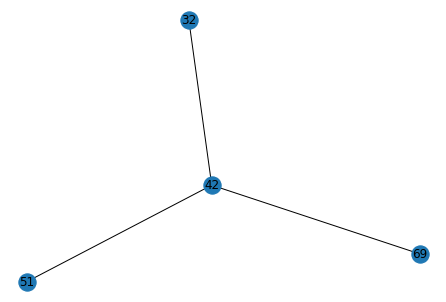

match_branches = []
edges_to_delete (resolve crossover) = [[32, 42], [32, 51], [32, 69], [42, 51], [42, 69], [51, 69]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[40, 41], [40, 42], [40, 43], [41, 43], [42, 43]]
Skipping endnode 73 because skeletal distance was 490.85612940208125 and threshold was 2500
skip_nodes = [73]
edges_to_delete (cut_limb_network) = [[32, 42], [32, 51], [32, 69], [42, 51], [42, 69], [51, 69]]
edges_to_create = []
Number of connected components = 7
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83}
Comp 1 = {40}
Comp 2 = {43}
Comp 3 = {32, 27, 22}
Comp 4 = {51}
Comp 5 = {69}
Comp 6 = {66}
curr_limb_copy.deleted_edges = [[40, 41], [40, 42], [40, 43], [41, 43], [42, 43], [32, 42], [32, 51], 

  Edge: [63 67]: curr_angle = 126.53
  Edge: [67 59]: curr_angle = 37.37
  Edge: [59 58]: curr_angle = 37.93
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [58 60]: curr_angle = 93.3

Total time for doubling_back = 0.08813667297363281
There were 1 edges that passed doubling back threshold of 100
Winning edge [63 67] had a doubling back of 126.52756779970328
***inside resolve crossover!!!!****
coordinate_branches = [63, 67, 73]
63 = red
67 = aqua
73 = purple
Angle between 63 and 67 = 115.87 
Angle between 63 and 73 = 38.34 
Angle between 67 and 73 = 42.63 
Final Matches = []
matched_branches_revised = []
Original graph


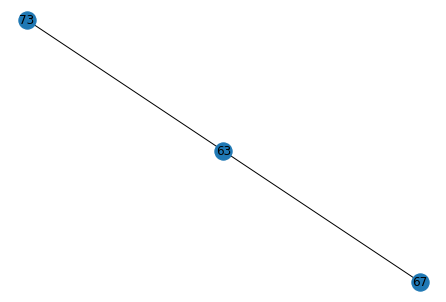

match_branches = []
edges_to_delete (resolve crossover) = [[63, 67], [63, 73], [67, 73]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([63, 67]), array([63, 73]), array([67, 73])]
edges_to_create = []
Number of connected components = 9
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 44, 45, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 67, 68, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83}
Comp 1 = {41, 42, 46, 48, 31, 63}
Comp 2 = {73}
Comp 3 = {40}
Comp 4 = {43}
Comp 5 = {32, 27, 22}
Comp 6 = {51}
Comp 7 = {69}
Comp 8 = {66}
curr_limb_copy.deleted_edges = [[40, 41], [40, 42], [40, 43], [41, 43], [42, 43], [32, 42], [32, 51], [32, 69], [42, 51], [42, 69], [51, 69], array([63, 67]), array([63, 73]), array([67, 73])]
curr_limb_copy.created_edges = [[41, 42]]
After get best cut: cut_edges = [array([63, 67]), array([63, 73]), array([

  Edge: [60 70]: curr_angle = 105.5
  Edge: [70 68]: curr_angle = 57.0
  Edge: [68 61]: curr_angle = 30.84
  Edge: [61 62]: curr_angle = 104.25
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [62 64]: curr_angle = 70.37
  Edge: [64 75]: curr_angle = 33.13

Total time for doubling_back = 0.11612987518310547
There were 2 edges that passed doubling back threshold of 100
Winning edge [60 70] had a doubling back of 105.5029729163607
***inside resolve crossover!!!!****
coordinate_branches = [60, 70, 74]
60 = red
70 = aqua
74 = purple
Angle between 60 and 70 = 128.1 
Angle between 60 and 74 = 17.24 
Angle between 70 and 74 = 36.19 
Final Matches = [[60, 74]]
matched_branches_revised = [[60, 74]]
Original graph


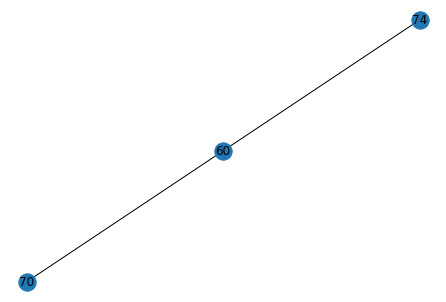

match_branches = [[60, 74]]
edges_to_delete (resolve crossover) = [[60, 70], [70, 74]]
edges_to_create (resolve crossover) = [[60, 74]]
edges_to_delete (cut_limb_network) = [array([60, 70]), array([70, 74])]
edges_to_create = [[60, 74]]
Number of connected components = 10
Comp 0 = {0, 1, 2, 6, 20, 21, 29, 33, 34, 35, 36, 37, 38, 39, 44, 45, 49, 50, 52, 53, 54, 55, 56, 57, 61, 62, 64, 65, 68, 70, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83}
Comp 1 = {3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24, 25, 26, 28, 30, 47, 58, 59, 60, 67, 74}
Comp 2 = {41, 42, 46, 48, 63, 31}
Comp 3 = {73}
Comp 4 = {40}
Comp 5 = {43}
Comp 6 = {32, 27, 22}
Comp 7 = {51}
Comp 8 = {69}
Comp 9 = {66}
curr_limb_copy.deleted_edges = [[40, 41], [40, 42], [40, 43], [41, 43], [42, 43], [32, 42], [32, 51], [32, 69], [42, 51], [42, 69], [51, 69], array([63, 67]), array([63, 73]), array([67, 73]), array([60, 70]), array([70, 74])]
curr_limb_copy.created_edges = [[41, 42], [60, 74]]
After get best cut: cu

  Edge: [9 6]: curr_angle = 42.04
  Edge: [6 4]: curr_angle = 79.68
  Edge: [4 5]: curr_angle = 124.49
  Edge: [5 7]: curr_angle = 46.12
  Edge: [ 7 10]: curr_angle = 159.83

Total time for doubling_back = 0.20415258407592773
There were 2 edges that passed doubling back threshold of 100
Winning edge [ 7 10] had a doubling back of 159.82869340211786
***inside resolve crossover!!!!****
coordinate_branches = [3, 7, 10]
3 = red
7 = aqua
10 = purple
Angle between 3 and 7 = 121.98 
Angle between 3 and 10 = 29.63 
Angle between 7 and 10 = 30.68 
Final Matches = [[3, 10], [7, 10]]
matched_branches_revised = [[3, 10]]
Original graph


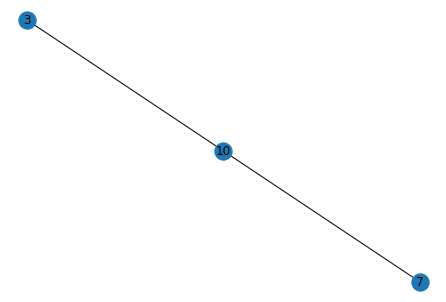

match_branches = [[3, 10]]
edges_to_delete (resolve crossover) = [[3, 7], [7, 10]]
edges_to_create (resolve crossover) = [[3, 10]]
edges_to_delete (cut_limb_network) = [array([3, 7]), array([ 7, 10])]
edges_to_create = [[3, 10]]
Number of connected components = 2
Comp 0 = {10, 3}
Comp 1 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12}
curr_limb_copy.deleted_edges = [array([3, 7]), array([ 7, 10])]
curr_limb_copy.created_edges = [[3, 10]]
After get best cut: cut_edges = [array([3, 7]), array([ 7, 10])], added_edges = [[3, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([10,  3]), array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 11, 12])]


 ------ Total time for Splitting 864691135385207893 = 55.16526651382446 ------


----

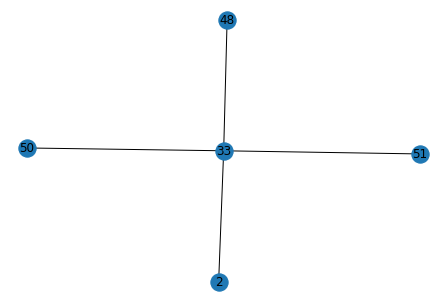

match_branches = [[33, 50], [2, 51]]
edges_to_delete (resolve crossover) = [[2, 33], [2, 48], [2, 50], [33, 48], [33, 51], [48, 50], [48, 51], [50, 51]]
edges_to_create (resolve crossover) = [[33, 50], [2, 51]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 33], [2, 48], [2, 50], [33, 48], [33, 51], [48, 50], [48, 51], [50, 51]]
edges_to_create = [[33, 50], [2, 51]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Comp 1 = {33, 70, 72, 15, 17, 50, 18, 56, 59, 30}
Comp 2 = {48}
curr_limb_copy.deleted_edges = [[2, 33], [2, 48], [2, 50], [33, 48], [33, 51], [48, 50], [48, 51], [50, 51]]
curr_limb_copy.create

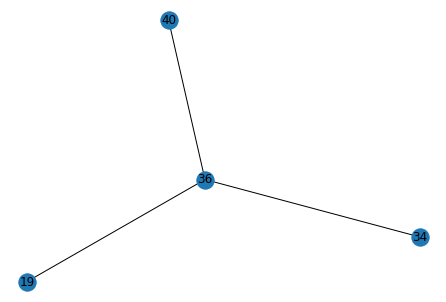

match_branches = [[34, 36]]
edges_to_delete (resolve crossover) = [[19, 34], [19, 36], [19, 40], [34, 40], [36, 40]]
edges_to_create (resolve crossover) = [[34, 36]]
curr_limb.deleted_edges 5 =[[2, 33], [2, 48], [2, 50], [33, 48], [33, 51], [48, 50], [48, 51], [50, 51]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[19, 34], [19, 36], [19, 40], [34, 40], [36, 40]]
edges_to_create = [[34, 36]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 3, 4, 5, 9, 10, 11, 12, 13, 14, 16, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 73, 74, 75, 81, 83, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Comp 1 = {33, 70, 72, 15, 17, 18, 50, 56, 59, 30}
Comp 2 = {48}
Comp 3 = {19}
Comp 4 = {68, 69, 6, 71, 40, 8, 7, 76, 78, 79, 80, 82, 84, 87, 55}
Comp 5 = {38}
Comp 6 = {77}
curr_limb_copy.deleted_edges = [[2, 33], [2, 48], [2, 50], [33, 48], [33, 51], [48, 50], [48, 51

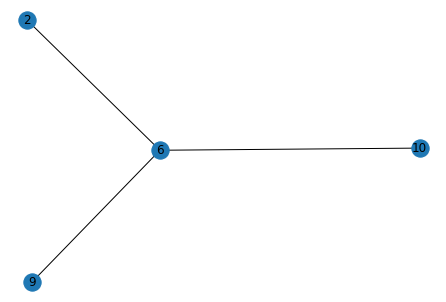

match_branches = [[6, 9], [2, 10]]
edges_to_delete (resolve crossover) = [[2, 6], [2, 9], [6, 10], [9, 10]]
edges_to_create (resolve crossover) = [[6, 9], [2, 10]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 6], [2, 9], [6, 10], [9, 10]]
edges_to_create = [[6, 9], [2, 10]]
Number of connected components = 2
Comp 0 = {0, 2, 3, 8, 10, 11, 12, 15, 16, 17, 19, 20, 22}
Comp 1 = {1, 4, 5, 6, 7, 9, 13, 14, 18, 21}
curr_limb_copy.deleted_edges = [[2, 6], [2, 9], [6, 10], [9, 10]]
curr_limb_copy.created_edges = [[6, 9], [2, 10]]
After get best cut: cut_edges = [[2, 6], [2, 9], [6, 10], [9, 10]], added_edges = [[6, 9], [2, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 

  Edge: [20 22]: curr_angle = 43.97
  Edge: [22 27]: curr_angle = 29.42
  Edge: [27 39]: curr_angle = 56.78
  Edge: [39 44]: curr_angle = 37.37
  Edge: [44 49]: curr_angle = 38.81
  Edge: [49 50]: curr_angle = 153.23
  Edge: [50 48]: curr_angle = 17.57
  Edge: [48 36]: curr_angle = 176.76
  Edge: [36 33]: curr_angle = 44.72
  Edge: [33 32]: curr_angle = 2.54
  Edge: [32 37]: curr_angle = 33.9
  Edge: [37 35]: curr_angle = 166.36
  Edge: [35 29]: curr_angle = 163.78
  Edge: [29 23]: curr_angle = 35.48
  Edge: [23 21]: curr_angle = 24.47

Total time for doubling_back = 1.3947770595550537
There were 4 edges that passed doubling back threshold of 100
Winning edge [48 36] had a doubling back of 176.75780366335607
***inside resolve crossover!!!!****
coordinate_branches = [28, 36, 48]
28 = red
36 = aqua
48 = purple
Angle between 28 and 36 = 49.01 
Angle between 28 and 48 = 130.68 
Angle between 36 and 48 = 24.68 
Final Matches = [[36, 48]]
matched_branches_revised = [[36, 48]]
Original graph


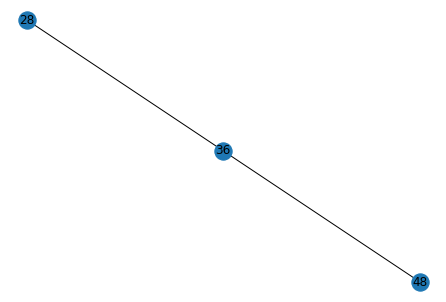

match_branches = [[36, 48]]
edges_to_delete (resolve crossover) = [[28, 36], [28, 48]]
edges_to_create (resolve crossover) = [[36, 48]]
Rejecting creating edge [36, 48] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([28, 36]), array([28, 48]), array([36, 48])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 22, 24, 26, 27, 31, 34, 39, 40, 41, 44, 45, 46, 47, 48, 49, 50, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Comp 1 = {28}
Comp 2 = {0, 1, 2, 15, 18, 19, 21, 23, 25, 29, 30, 32, 33, 35, 36, 37, 38, 42, 43, 51, 52, 53, 54, 55}
curr_limb_copy.deleted_edges = [array([28, 36]), array([28, 48]), array([36, 48])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([28, 36]), array([28, 48]), array([36, 48])], add

  Edge: [20 22]: curr_angle = 43.97
  Edge: [22 27]: curr_angle = 29.42
  Edge: [27 39]: curr_angle = 56.78
  Edge: [39 40]: curr_angle = 121.29
  Edge: [40 56]: curr_angle = 75.91
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [56 46]: curr_angle = 78.06
  Edge: [46 41]: curr_angle = 39.67
  Edge: [41 47]: curr_angle = 18.15

Total time for doubling_back = 0.29345035552978516
There were 1 edges that passed doubling back threshold of 100
Winning edge [39 40] had a doubling back of 121.29012558109144
***inside resolve crossover!!!!****
coordinate_branches = [27, 39, 40]
27 = red
39 = aqua
40 = purple
Angle between 27 and 39 = 46.87 
Angle between 27 and 40 = 16.72 
Angle between 39 and 40 = 119.47 
Final Matches = [[27, 40]]
matched_branches_revised = [[27, 40]]
Original graph


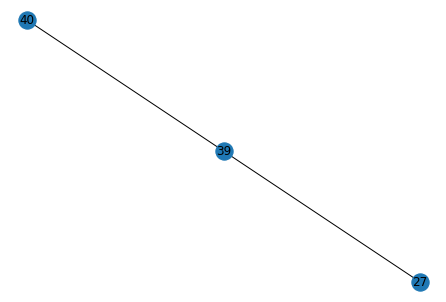

match_branches = [[27, 40]]
edges_to_delete (resolve crossover) = [[27, 39], [39, 40]]
edges_to_create (resolve crossover) = [[27, 40]]
edges_to_delete (cut_limb_network) = [array([27, 39]), array([39, 40])]
edges_to_create = [[27, 40]]
Number of connected components = 4
Comp 0 = {3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 20, 22, 24, 26, 27, 31, 40, 41, 46, 47, 56, 57, 59, 60, 63, 64, 65, 66, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Comp 1 = {34, 67, 68, 70, 39, 71, 44, 45, 48, 49, 50, 16, 58, 61, 62}
Comp 2 = {28}
Comp 3 = {0, 1, 2, 15, 18, 19, 21, 23, 25, 29, 30, 32, 33, 35, 36, 37, 38, 42, 43, 51, 52, 53, 54, 55}
curr_limb_copy.deleted_edges = [array([28, 36]), array([28, 48]), array([36, 48]), array([27, 39]), array([39, 40])]
curr_limb_copy.created_edges = [[27, 40]]
After get best cut: cut_edges = [array([27, 39]), array([39, 40])], added_edges = [[27, 40]]
total_soma_paths_to_cut = []
-----------c

  Edge: [20 22]: curr_angle = 43.97
  Edge: [22 27]: curr_angle = 29.42
  Edge: [27 40]: curr_angle = 1.93
  Edge: [40 56]: curr_angle = 75.91
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [56 46]: curr_angle = 78.06
  Edge: [46 41]: curr_angle = 39.67
  Edge: [41 47]: curr_angle = 18.15

Total time for doubling_back = 0.2719080448150635

Attempting the width jump check (attempting from both sides)
  Edge: [20 22]: jump = -137.43
  Edge: [22 27]: jump = -172.41
  Edge: [27 40]: jump = 129.68
  Edge: [40 56]: jump = -340.15
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [56 46]: jump = 293.08
Adding error edge [56 46] because width jump was 293.08166786396714
  Edge: [46 41]: jump = -9.45
  Edge: [41 47]: jump = 139.15
Total time for width = 0.24811053276062012
Path starting at 20 had err_edges: [[56, 46]]
  Edge: [47 41]: jump = -139.15
  Edge: [41 46]: jump = 9.45
  Edge: [46 56]: jump = -293.08

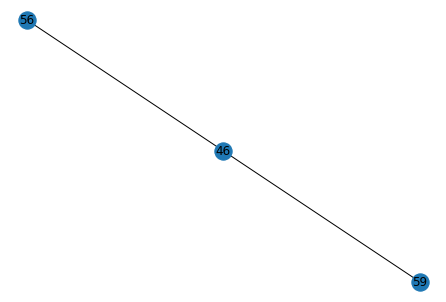

match_branches = [[46, 59]]
edges_to_delete (resolve crossover) = [[46, 56], [56, 59]]
edges_to_create (resolve crossover) = [[46, 59]]
edges_to_delete (cut_limb_network) = [array([46, 56]), array([56, 59])]
edges_to_create = [[46, 59]]
Number of connected components = 5
Comp 0 = {14, 17, 20, 22, 24, 26, 27, 40, 56, 57, 60, 63, 64, 65, 66, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Comp 1 = {34, 67, 68, 70, 39, 71, 44, 45, 16, 49, 50, 48, 58, 61, 62}
Comp 2 = {3, 4, 5, 6, 7, 8, 41, 9, 10, 12, 13, 46, 47, 11, 59, 31}
Comp 3 = {28}
Comp 4 = {0, 1, 2, 15, 18, 19, 21, 23, 25, 29, 30, 32, 33, 35, 36, 37, 38, 42, 43, 51, 52, 53, 54, 55}
curr_limb_copy.deleted_edges = [array([28, 36]), array([28, 48]), array([36, 48]), array([27, 39]), array([39, 40]), array([46, 56]), array([56, 59])]
curr_limb_copy.created_edges = [[27, 40], [46, 59]]
After get best cut: cut_edges = [array([46, 56]), array([56, 59])], added_edges 

  Edge: [20 22]: curr_angle = 43.97
  Edge: [22 27]: curr_angle = 29.42
  Edge: [27 40]: curr_angle = 1.93
  Edge: [40 57]: curr_angle = 48.28
  Edge: [57 75]: curr_angle = 41.24
  Edge: [75 79]: curr_angle = 7.42
  Edge: [ 79 100]: curr_angle = 43.78

Total time for doubling_back = 0.4742155075073242

Attempting the width jump check (attempting from both sides)
  Edge: [20 22]: jump = -137.43
  Edge: [22 27]: jump = -172.41
  Edge: [27 40]: jump = 129.68
  Edge: [40 57]: jump = -84.77
  Edge: [57 75]: jump = 163.01
  Edge: [75 79]: jump = -251.33
  Edge: [ 79 100]: jump = 180.35
Total time for width = 0.4390532970428467
Path starting at 20 had err_edges: []
  Edge: [100  79]: jump = -180.35
  Edge: [79 75]: jump = 251.33
Adding error edge [79 75] because width jump was 251.3293264646049
  Edge: [75 57]: jump = -163.01
  Edge: [57 40]: jump = 84.77
  Edge: [40 27]: jump = -129.68
  Edge: [27 22]: jump = 172.41
  Edge: [22 20]: jump = 137.43
Total time for width = 0.4503629207611084
Pat

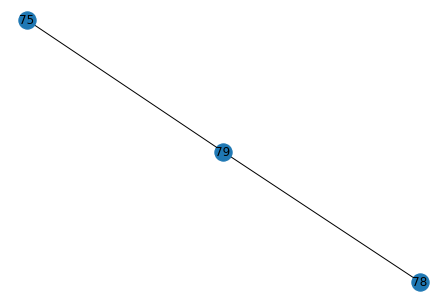

match_branches = [[75, 79]]
edges_to_delete (resolve crossover) = [[75, 78], [78, 79]]
edges_to_create (resolve crossover) = [[75, 79]]
Rejecting creating edge [75, 79] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([75, 78]), array([75, 79]), array([78, 79])]
edges_to_create = []
Number of connected components = 7
Comp 0 = {14, 17, 20, 22, 24, 26, 27, 40, 56, 57, 60, 63, 64, 65, 66, 72, 73, 74, 75, 76, 81, 83, 84, 85, 96, 98, 99}
Comp 1 = {34, 67, 68, 70, 39, 71, 44, 45, 16, 49, 50, 48, 58, 61, 62}
Comp 2 = {3, 4, 5, 6, 7, 8, 41, 9, 10, 12, 13, 46, 47, 11, 59, 31}
Comp 3 = {78}
Comp 4 = {97, 100, 69, 77, 79, 80, 82, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95}
Comp 5 = {28}
Comp 6 = {0, 1, 2, 15, 18, 19, 21, 23, 25, 29, 30, 32, 33, 35, 36, 37, 38, 42, 43, 51, 52, 53, 54, 55}
curr_limb_copy.deleted_edges = [array([28, 36]), array([28, 48]), array([36, 48]), array([27, 39]), array([39, 40]), array([46, 56]), array([56, 59]), array([75, 78]

  Edge: [26 27]: curr_angle = 9.5
  Edge: [27 24]: curr_angle = 22.06
  Edge: [24 21]: curr_angle = 14.98
  Edge: [21 20]: curr_angle = 8.71
  Edge: [20 15]: curr_angle = 2.96
  Edge: [15 16]: curr_angle = 23.5
  Edge: [16 13]: curr_angle = 20.19
  Edge: [13 12]: curr_angle = 12.31
  Edge: [12 36]: curr_angle = 12.86
  Edge: [36 52]: curr_angle = 33.74
  Edge: [52 55]: curr_angle = 46.55
  Edge: [55 63]: curr_angle = 8.65
  Edge: [63 85]: curr_angle = 37.64
  Edge: [85 86]: curr_angle = 4.58
  Edge: [86 83]: curr_angle = 9.95
  Edge: [83 77]: curr_angle = 17.46
  Edge: [77 78]: curr_angle = 18.54
  Edge: [78 93]: curr_angle = 13.63
  Edge: [ 93 100]: curr_angle = 18.16
  Edge: [100 102]: curr_angle = 42.15
  Edge: [102 114]: curr_angle = 25.83
  Edge: [114 125]: curr_angle = 37.39
  Edge: [125 126]: curr_angle = 30.2
  Edge: [126 136]: curr_angle = 37.92
  Edge: [136 142]: curr_angle = 9.48

Total time for doubling_back = 1.8720793724060059

Attempting the width jump check (attempting 

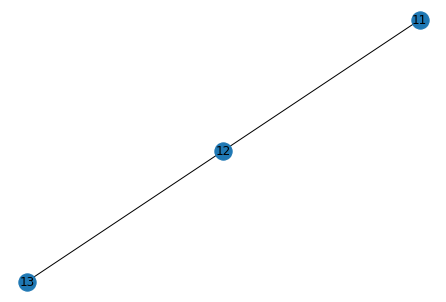

match_branches = [[12, 13]]
edges_to_delete (resolve crossover) = [[11, 12], [11, 13]]
edges_to_create (resolve crossover) = [[12, 13]]
Rejecting creating edge [12, 13] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([11, 12]), array([11, 13]), array([12, 13])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {2, 3, 5, 6, 7, 8, 9, 10, 12, 14, 22, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 

  Edge: [142 136]: curr_angle = 9.48
  Edge: [136 126]: curr_angle = 37.92
  Edge: [126 125]: curr_angle = 46.06
  Edge: [125 114]: curr_angle = 14.62
  Edge: [114 102]: curr_angle = 25.83
  Edge: [102 100]: curr_angle = 42.63
  Edge: [100  93]: curr_angle = 34.94
  Edge: [93 78]: curr_angle = 13.63
  Edge: [78 77]: curr_angle = 18.54
  Edge: [77 83]: curr_angle = 17.46
  Edge: [83 86]: curr_angle = 9.95
  Edge: [ 86 219]: curr_angle = 91.03
  Edge: [219 112]: curr_angle = 84.08
  Edge: [112 164]: curr_angle = 49.26
  Edge: [164 167]: curr_angle = 69.67

Total time for doubling_back = 0.8076918125152588

Attempting the width jump check (attempting from both sides)
  Edge: [142 136]: jump = 145.37
  Edge: [136 126]: jump = -18.67
  Edge: [126 125]: jump = -50.61
  Edge: [125 114]: jump = 44.49
  Edge: [114 102]: jump = -153.11
  Edge: [102 100]: jump = 94.97
  Edge: [100  93]: jump = -73.81
  Edge: [93 78]: jump = -123.96
  Edge: [78 77]: jump = 246.75
Adding error edge [78 77] because 

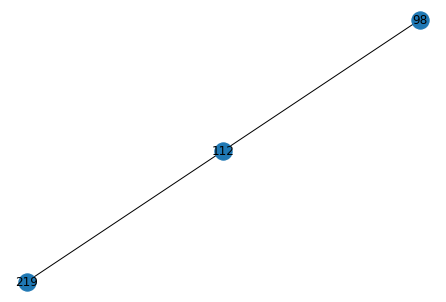

match_branches = [[98, 112]]
edges_to_delete (resolve crossover) = [[98, 219], [112, 219]]
edges_to_create (resolve crossover) = [[98, 112]]
edges_to_delete (cut_limb_network) = [array([ 98, 219]), array([112, 219])]
edges_to_create = [[98, 112]]
Number of connected components = 4
Comp 0 = {2, 3, 5, 6, 7, 8, 9, 10, 12, 14, 22, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 157, 159, 160, 161, 162, 165, 174, 218, 219}
Comp 1 = {179, 205, 139, 141, 206, 149, 156, 158, 184, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 186, 47, 175, 176, 178

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")